# 따릉이 대여량 예측
    - 1) 결측치 확인
    - 2) dataframe 데이터 형태 다 숫자로 변환(모델 학습을 위해)
    - 3) 변수 및 모델 정의
    - 4) 예측값 plot으로 확인하기
    - 5) 결과 제출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 

C:\Users\whfh1\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
bicycle = pd.read_csv('dataset/train.csv')
bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


## 1) 결측치 확인

In [3]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(bicycle.columns):
        missing_values = sum(bicycle[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(bicycle.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(bicycle)

결측치가 존재하지 않습니다


## 2) Data Processing

In [4]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.date_time:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(bicycle)
    
bicycle['year'] = year
bicycle['month'] = month
bicycle['day'] = day

bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


#### => 년도, 월, 일이 전부 잘 분리되어 들어가있다

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text xticklabel objects>)

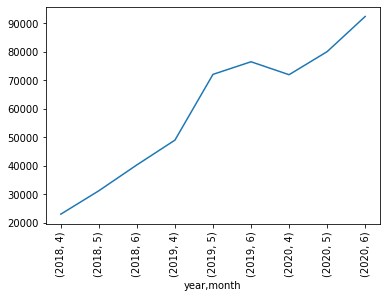

In [5]:
bicycle.groupby(['year', 'month'])['number_of_rentals'].mean().plot()
plt.xticks(rotation=90)

## 3) feature selection
    - pairplot
    - 상관계수 구하기

C:\Users\whfh1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\whfh1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


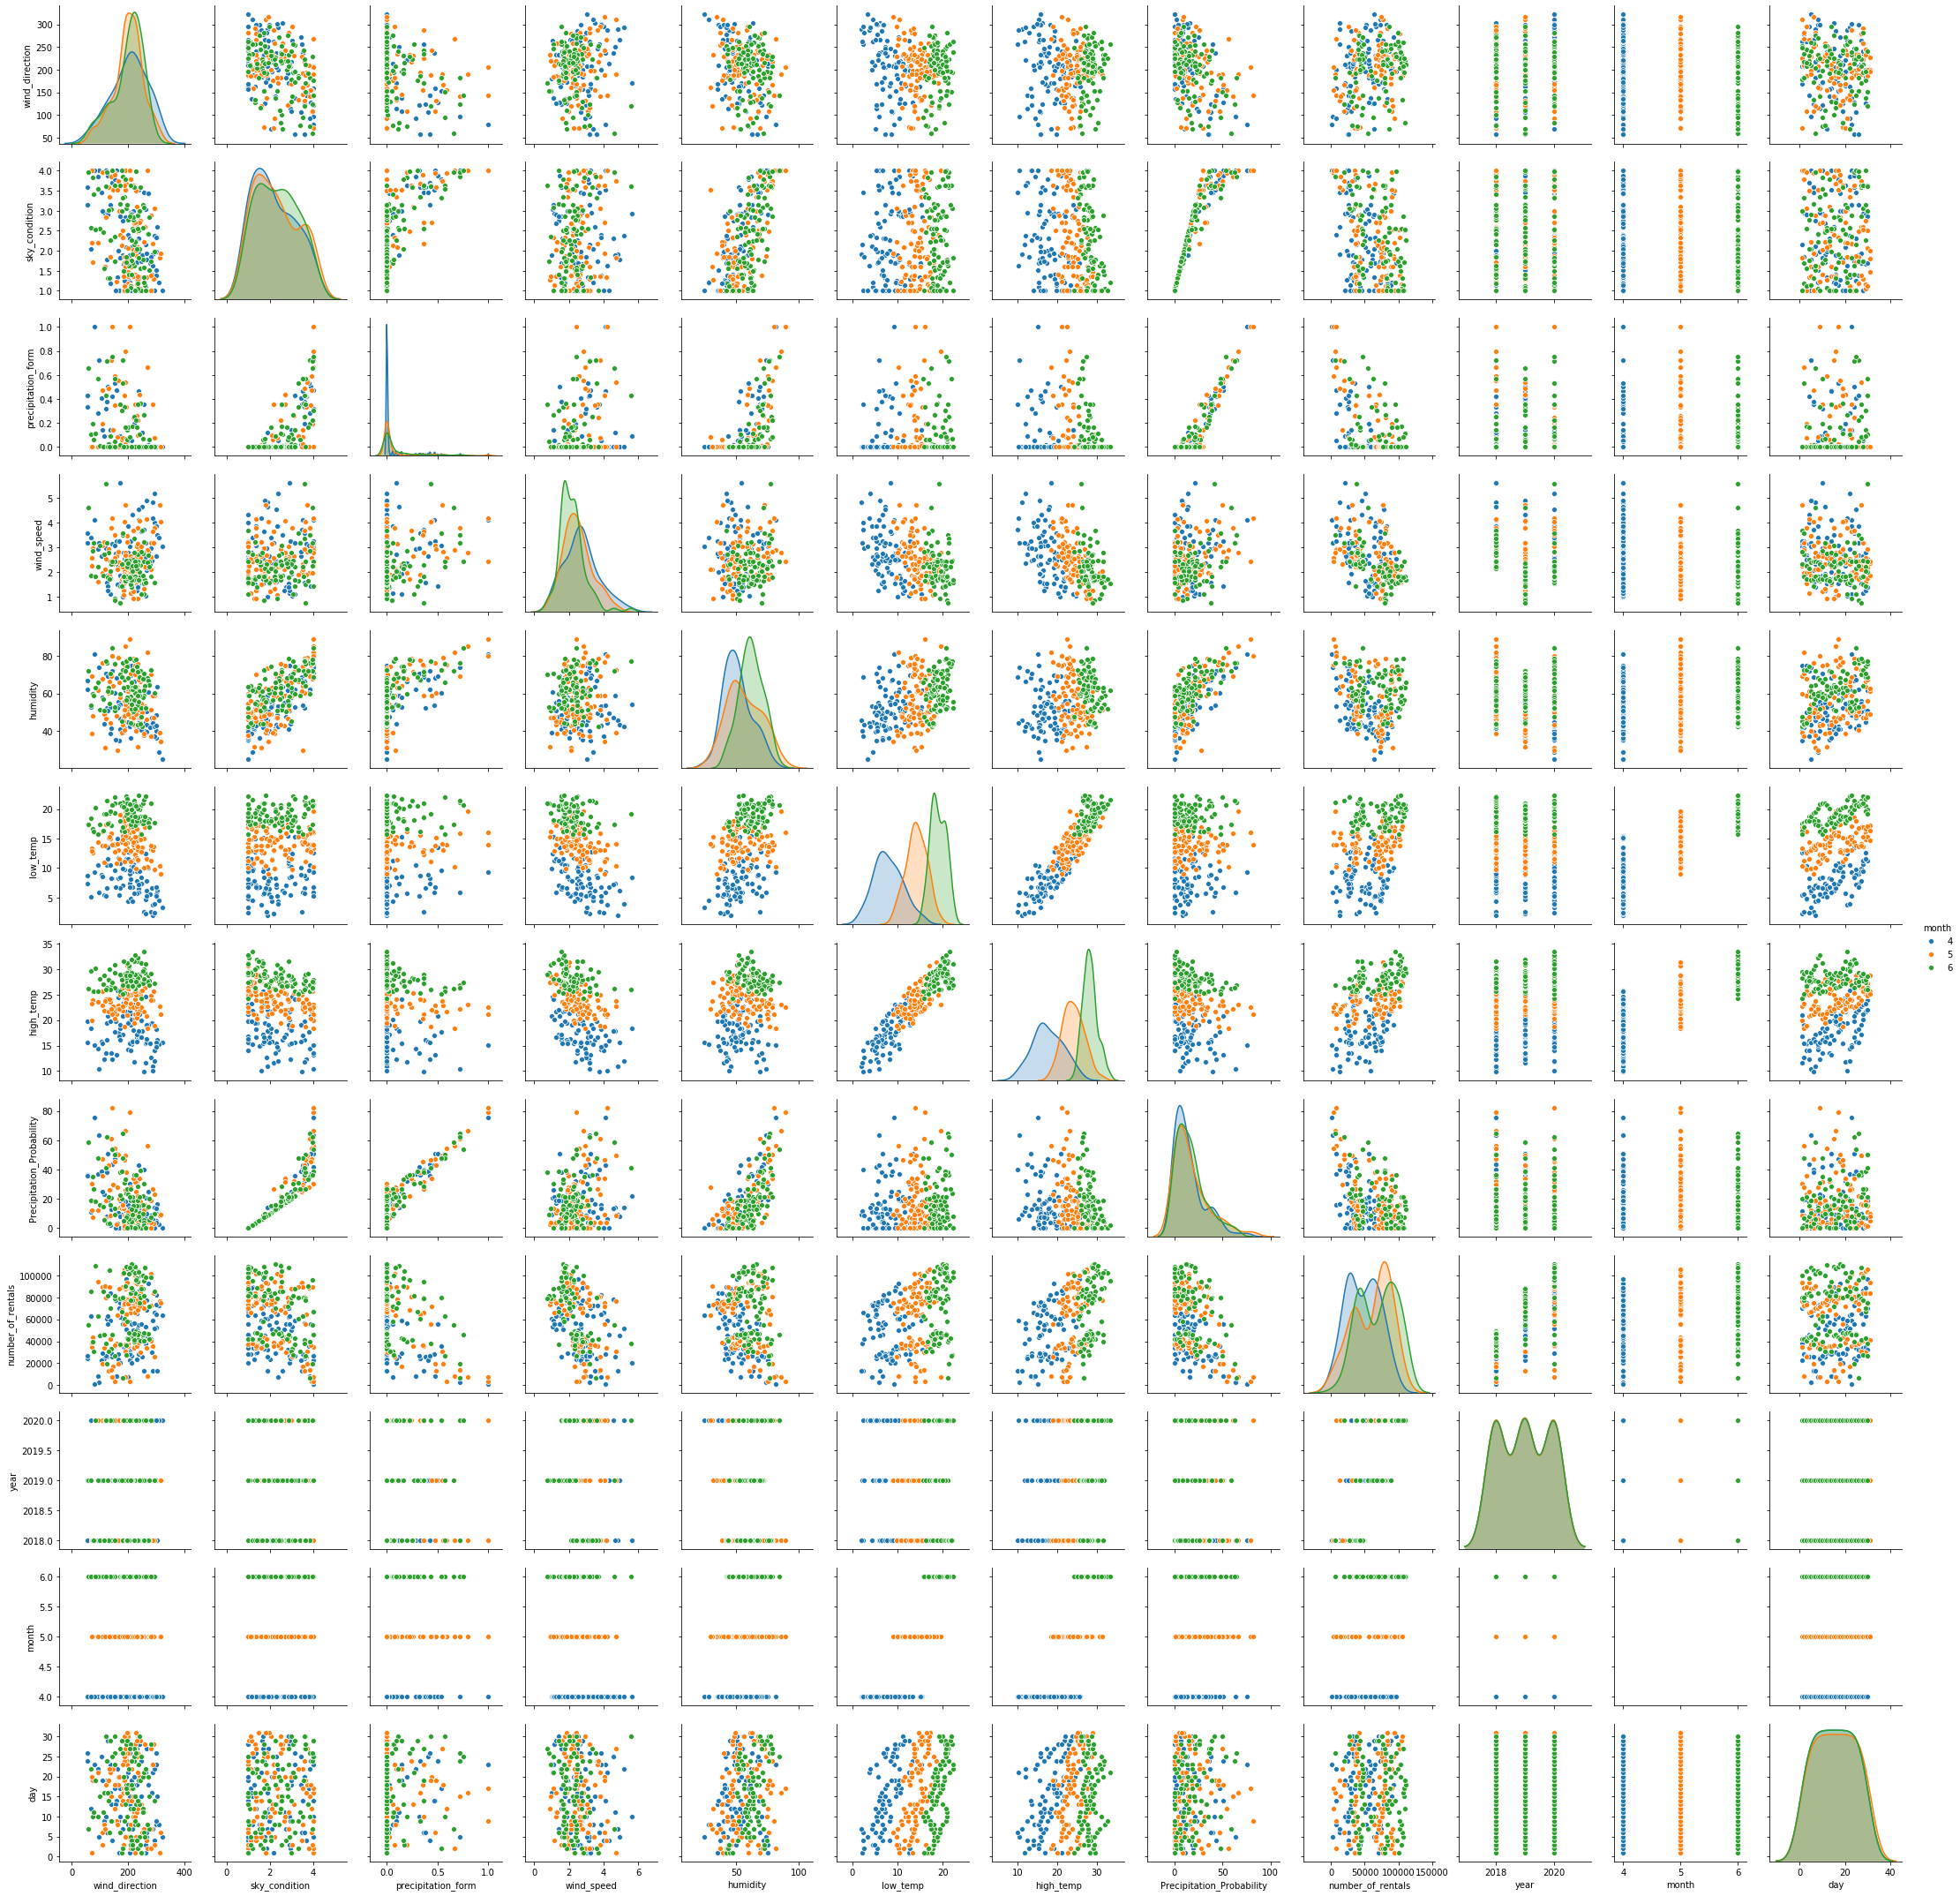

In [6]:
sns.pairplot(bicycle, hue = "month")
plt.show()

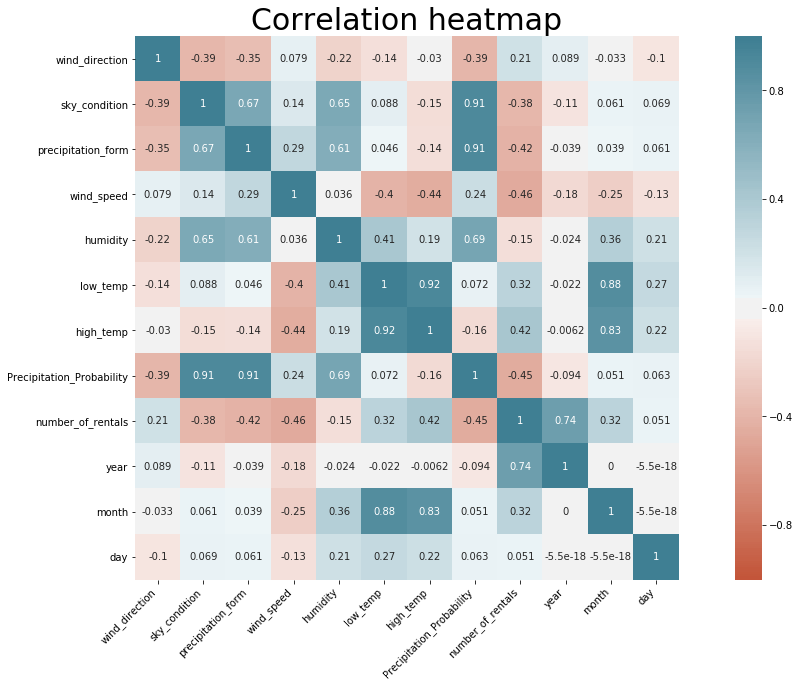

In [7]:
bicycle_number = bicycle.select_dtypes(np.number)#상관분석은 숫자로 계산할 수 있으므로 데이터에서 숫자로 이루어진 컬럼만을 뽑겠습니다 (date_time drop)

corr = bicycle_number.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('Correlation heatmap', fontsize=30)
plt.show()

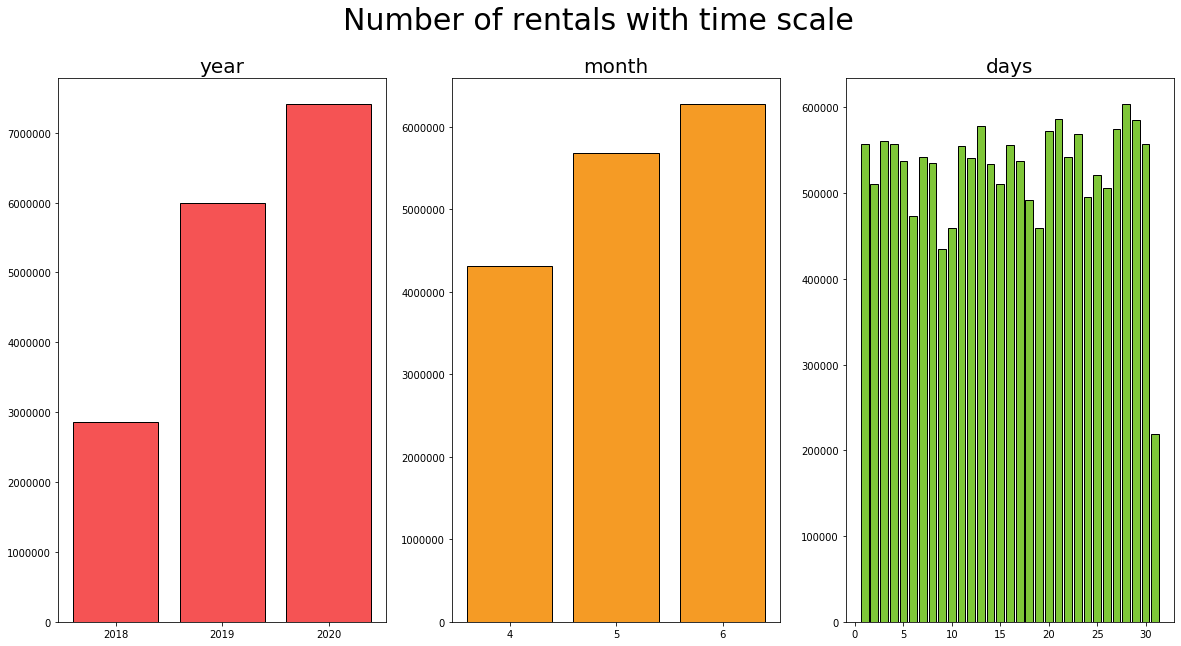

In [8]:
year_rentals = bicycle.groupby('year').sum()['number_of_rentals']
month_rentals = bicycle.groupby('month').sum()['number_of_rentals']
day_rentals = bicycle.groupby('day').sum()['number_of_rentals']

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Number of rentals with time scale', fontsize=30)

ax[0].bar(x=['2018', '2019', '2020'], height=year_rentals, color='#f55354', edgecolor='black')
ax[0].set_title('year', fontsize = 20)

ax[1].bar(x = ['4', '5', '6'], height=month_rentals, color='#f59b25', edgecolor='black')
ax[1].set_title('month', fontsize = 20)

ax[2].bar(x=day_rentals.index.to_list(), height= day_rentals, color='#7fc638', edgecolor='black')
ax[2].set_title('days', fontsize = 20)

plt.show()

- number_of_rentals와 다른 feature들의 연관성 확인해보자
    - wind_direction, sky_condition, wind_speed 들은 상대적으로 연관성이 적다고 보여진다.(추측)
    - humidity(습도)는 온도와도 간접적으로 연결이 되어있으므로 제외시키지 않는다.

#### bicycle_train.csv : 학습 데이터
- date_time : 일별 날짜
- wind_direction: 풍향 (degree)
- sky_condition : 하늘 상태 (하단 설명 참조)
- precipitation_form : 강수 형태 (하단 설명 참조)
- wind_speed : 풍속 (m/s)
- humidity : 습도 (%)
- low_temp : 최저 기온 ( `C)
- high_temp : 최고 기온 ( `C)
- Precipitation_Probability : 강수 확률 (%)
- number_of_rentals : 따릉이 대여량

#### 데이터 상세 설명
 - 기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.
 - 2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)
 - 2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)
 - precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
 - 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.

### 3-1)  Feature Engineering

In [9]:
bicycle.columns.values

array(['date_time', 'wind_direction', 'sky_condition',
       'precipitation_form', 'wind_speed', 'humidity', 'low_temp',
       'high_temp', 'Precipitation_Probability', 'number_of_rentals',
       'year', 'month', 'day'], dtype=object)

In [10]:
X_train = bicycle.drop(['date_time', 'number_of_rentals','wind_direction','humidity','sky_condition','wind_speed'], axis=1)
y_train = bicycle.number_of_rentals

# Model Learning & Prediction

In [40]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Model 1) LinearRegression

모델 NMAE: 0.33896881286413266


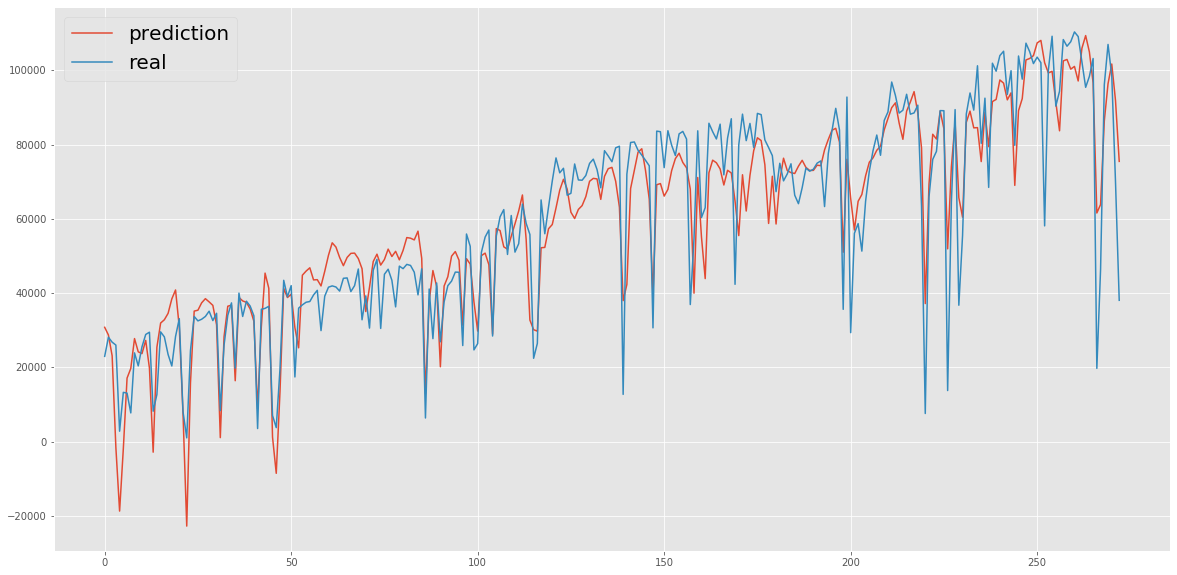

In [50]:
#sklearn에서 제공하는 선형회귀 모델을 사용할게요.
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 모델 정의
model.fit(X_train, y_train) # 학습
y_hat = model.predict(X_train) # y 예측
nmae = np.mean(abs(y_hat - y_train) / y_train) # nmae 계산

print(f'모델 NMAE: {nmae}')

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y_train, label = 'real')
plt.legend(fontsize = 20)
plt.show()

## Model 2) ElasticNet linear

C:\Users\whfh1\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17849814861.273327, tolerance: 20809417.990786813
  positive)


모델 NMAE: 0.312653410641626


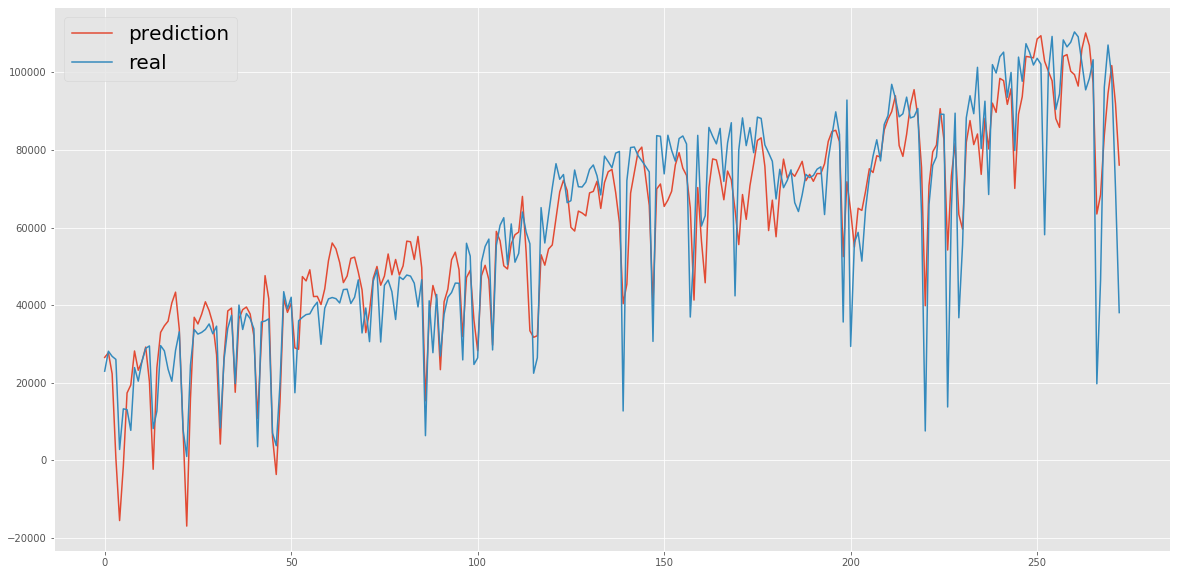

모델 NMAE: 0.3136834303780776


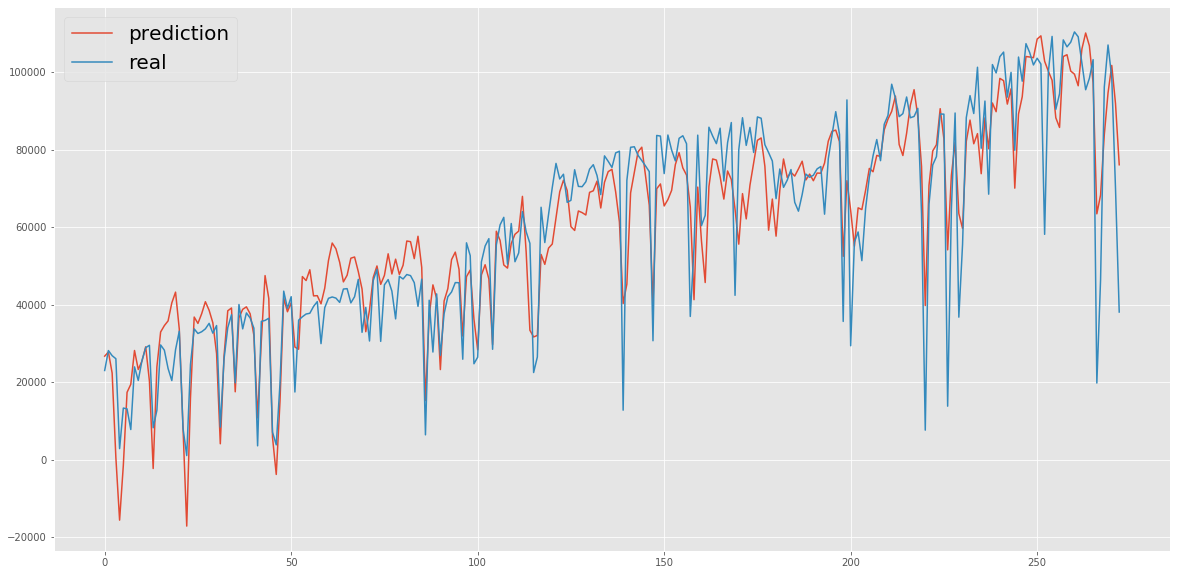

모델 NMAE: 0.3148904743355225


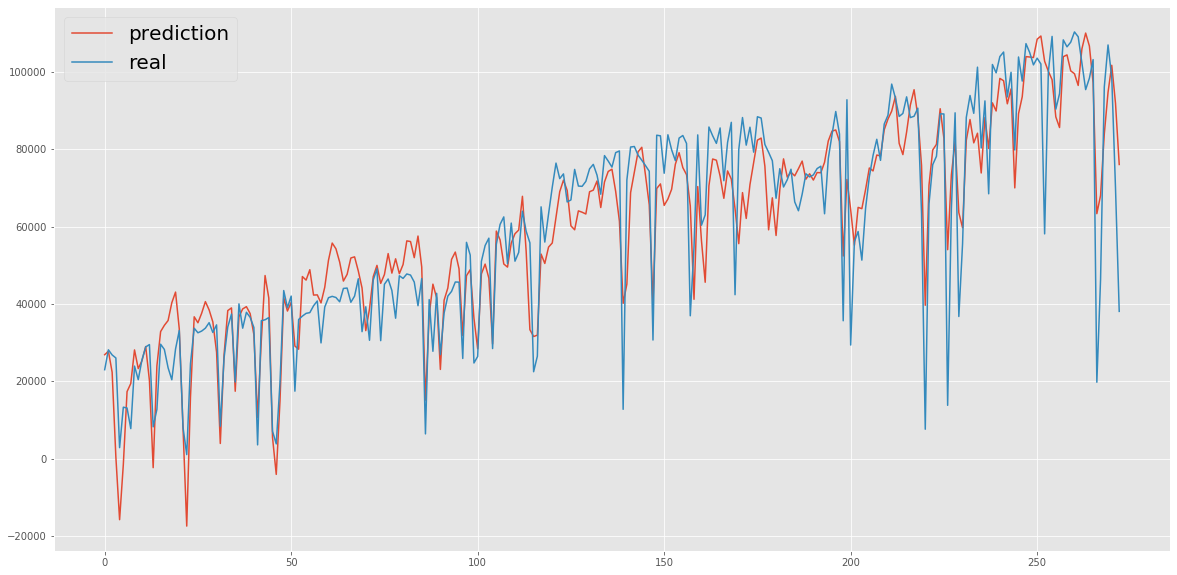

모델 NMAE: 0.3198206595393039


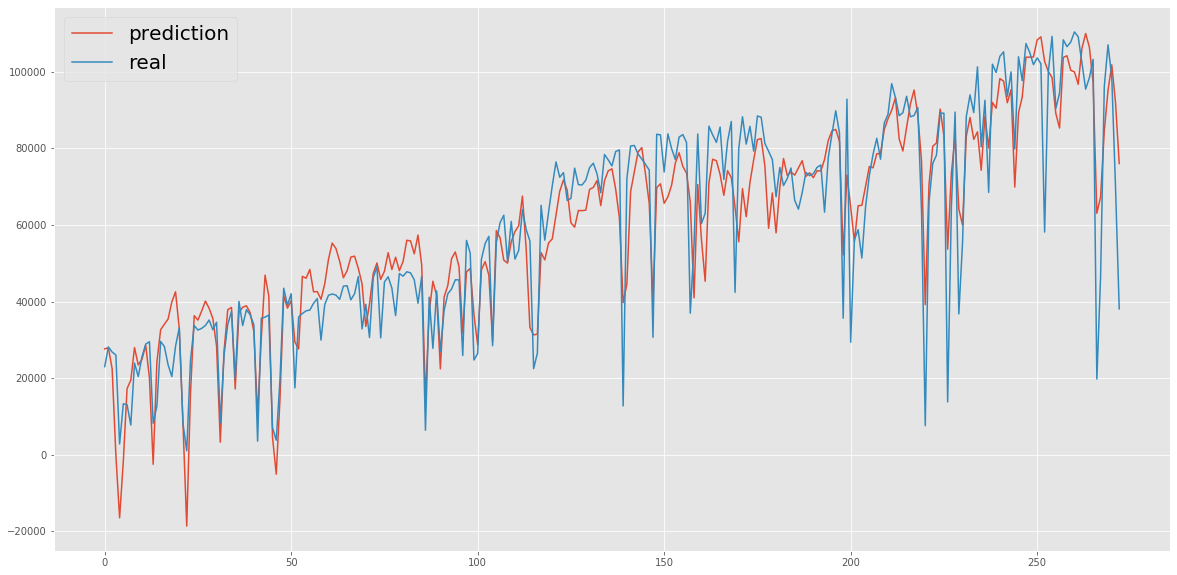

모델 NMAE: 0.3283948280389432


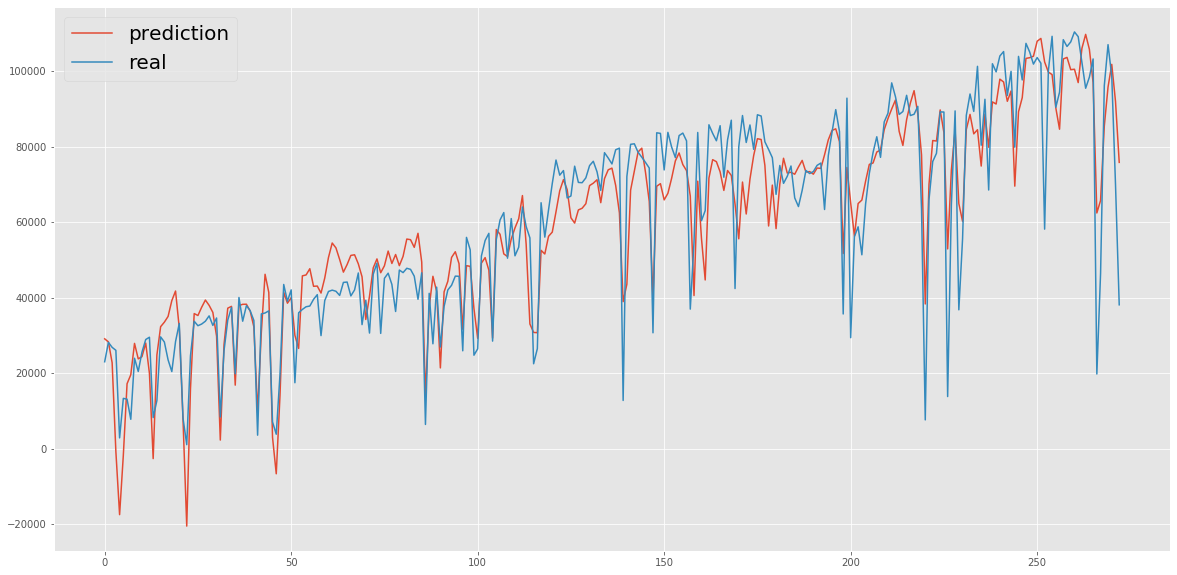

In [59]:
from sklearn.linear_model import ElasticNet
alpha=0.01

ratios = [0, 0.1, 0.2, 0.5, 0.8]
for ratio in ratios:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=0)
    elasticnet.fit(X_train, y_train)
    y_hat = elasticnet.predict(X_train)
    #y_hat = model.predict(X_train) # y 예측
    nmae = np.mean(abs(y_hat - y_train) / y_train) # nmae 계산

    print(f'모델 NMAE: {nmae}')

    import matplotlib.pyplot as plt

    plt.style.use('ggplot')
    plt.figure(figsize=(20, 10))
    plt.plot(y_hat, label = 'prediction')
    plt.plot(y_train, label = 'real')
    plt.legend(fontsize = 20)
    plt.show()


C:\Users\whfh1\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17849814861.273327, tolerance: 20809417.990786813
  positive)


모델 NMAE: 0.312653410641626


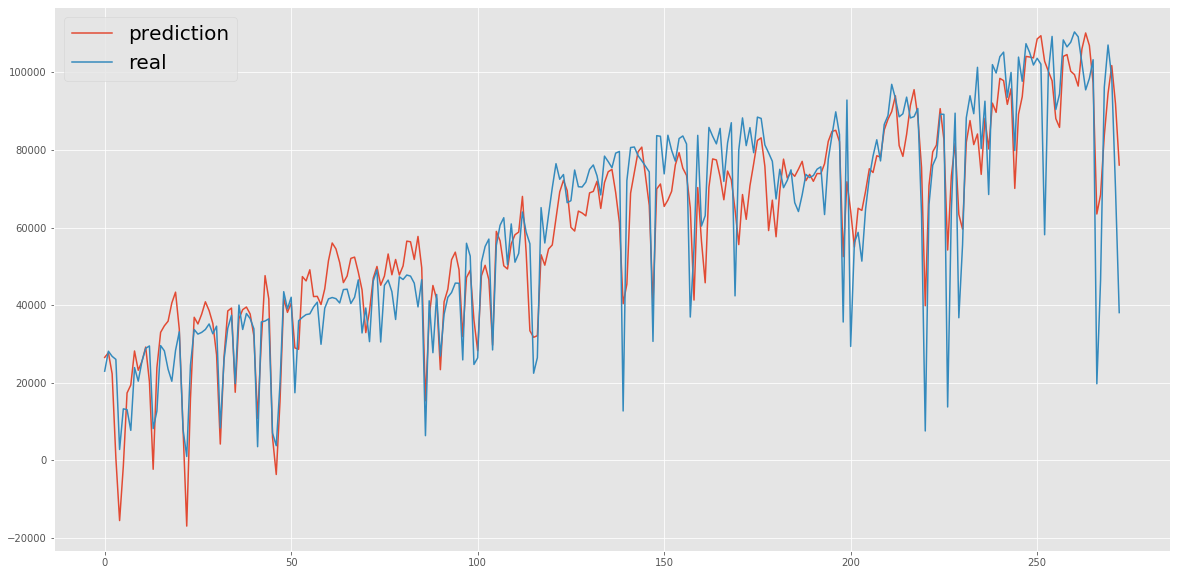

In [60]:
elasticnet = ElasticNet(alpha=alpha, l1_ratio=0, random_state=0)
elasticnet.fit(X_train, y_train)
y_hat = elasticnet.predict(X_train)
#y_hat = model.predict(X_train) # y 예측
nmae = np.mean(abs(y_hat - y_train) / y_train) # nmae 계산

print(f'모델 NMAE: {nmae}')

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y_train, label = 'real')
plt.legend(fontsize = 20)
plt.show()


In [82]:
test_X = test.drop(['date_time','wind_direction','sky_condition','wind_speed'], axis = 1)
test_yhat = elasticnet.predict(test_X)
submission['number_of_rentals'] = test_yhat
submission.to_csv('sample_submission_elasticnet.csv', index= False)

## Model 3) PolynomialFeatures

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)[0]
poly_features

array([0.000000e+00, 7.500000e+01, 1.260000e+01, 2.100000e+01,
       3.000000e+01, 2.018000e+03, 4.000000e+00, 1.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       5.625000e+03, 9.450000e+02, 1.575000e+03, 2.250000e+03,
       1.513500e+05, 3.000000e+02, 7.500000e+01, 1.587600e+02,
       2.646000e+02, 3.780000e+02, 2.542680e+04, 5.040000e+01,
       1.260000e+01, 4.410000e+02, 6.300000e+02, 4.237800e+04,
       8.400000e+01, 2.100000e+01, 9.000000e+02, 6.054000e+04,
       1.200000e+02, 3.000000e+01, 4.072324e+06, 8.072000e+03,
       2.018000e+03, 1.600000e+01, 4.000000e+00, 1.000000e+00])

In [79]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.8)
)

C:\Users\whfh1\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13821263236.244568, tolerance: 20809417.990786813
  positive)


모델 NMAE: 0.29054672201728027


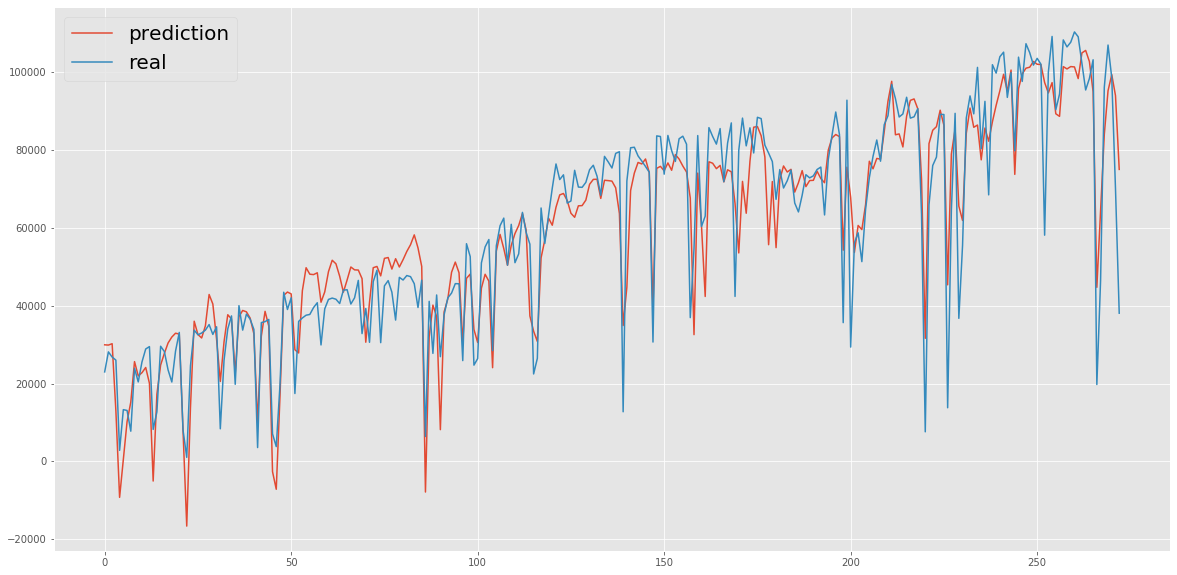

In [80]:
poly_pipeline.fit(X_train, y_train)
y_hat = poly_pipeline.predict(X_train)
nmae = np.mean(abs(y_hat - y_train) / y_train) # nmae 계산

print(f'모델 NMAE: {nmae}')

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y_train, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [81]:
test_X = test.drop(['date_time','wind_direction','sky_condition','wind_speed'], axis = 1)
test_yhat = poly_pipeline.predict(test_X)
submission['number_of_rentals'] = test_yhat
submission.to_csv('sample_submission_poly_pipeline.csv', index= False)

## Model 4) Randomforest

모델 NMAE: 0.12843963570410516


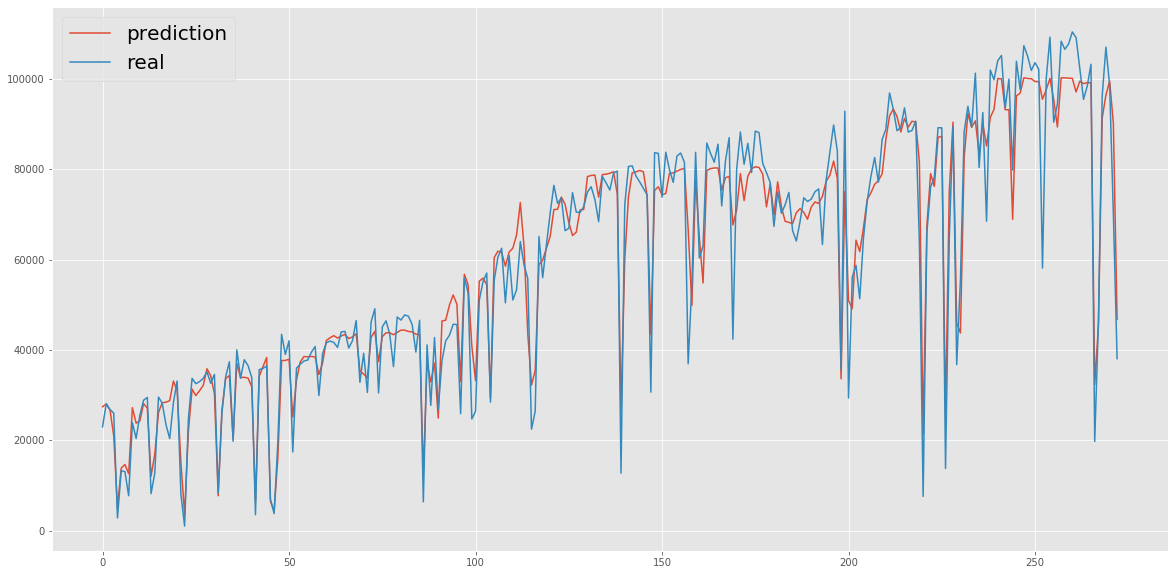

In [84]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, random_state=0)
model.fit(X_train,y_train)
y_hat = model.predict(X_train) # y 예측
nmae = np.mean(abs(y_hat - y_train) / y_train) # nmae 계산

print(f'모델 NMAE: {nmae}')

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y_train, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [107]:
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8,]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
forest_reg = RandomForestRegressor()
 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
 
grid_search.fit(X_train, y_train)
grid_search.best_params_


{'max_features': 8, 'n_estimators': 30}

In [108]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

18880.785673667604 {'max_features': 2, 'n_estimators': 3}
18140.214351908762 {'max_features': 2, 'n_estimators': 10}
17156.41420910348 {'max_features': 2, 'n_estimators': 30}
17702.652668492778 {'max_features': 4, 'n_estimators': 3}
15253.195524128032 {'max_features': 4, 'n_estimators': 10}
14499.969321531658 {'max_features': 4, 'n_estimators': 30}
15850.126091974324 {'max_features': 6, 'n_estimators': 3}
14420.508888692542 {'max_features': 6, 'n_estimators': 10}
13275.152653923185 {'max_features': 6, 'n_estimators': 30}
15183.654832280537 {'max_features': 8, 'n_estimators': 3}
13498.253403307495 {'max_features': 8, 'n_estimators': 10}
13879.487585069868 {'max_features': 8, 'n_estimators': 30}
17788.490984584652 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
16628.920219101128 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
15232.77152811453 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
14259.162613489263 {'bootstrap': False, 'max_features': 3, 'n_e

모델 NMAE: 0.09103440232503845


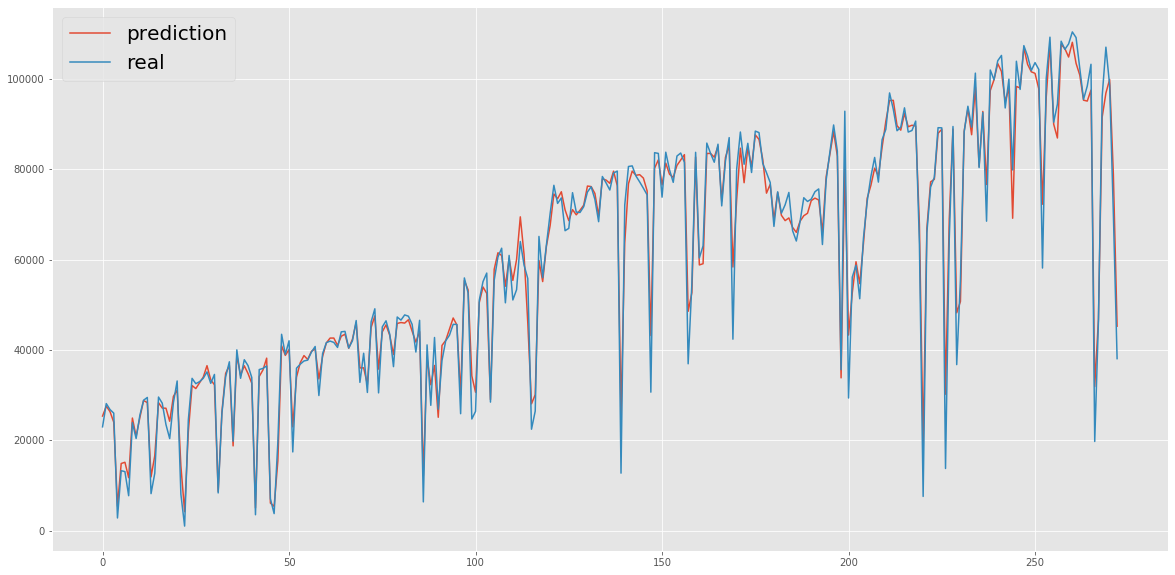

In [105]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_features=8, n_estimators = 30,random_state=0)
model.fit(X_train,y_train)
y_hat = model.predict(X_train) # y 예측
nmae = np.mean(abs(y_hat - y_train) / y_train) # nmae 계산

print(f'모델 NMAE: {nmae}')

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y_train, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [110]:
test_X = test.drop(['date_time','wind_direction','sky_condition','wind_speed'], axis = 1)
test_yhat = model.predict(test_X)
submission['number_of_rentals'] = test_yhat
submission.to_csv('sample_submission_Randomforest_830.csv', index= False)

### 결과 제출

In [38]:
#결과 제출
test = pd.read_csv('dataset/test.csv') # 데이터를 불러온 뒤
submission  = pd.read_csv('dataset/sample_submission.csv')
check_missing_col(test) # 결측치 확인
year, month, day = seperate_datetime(test) #날짜 숫자로 분리 후 

#새로운 컬럼을 생성
test['year'] = year 
test['month'] = month
test['day'] = day

test.head()

결측치가 존재하지 않습니다


,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5


In [47]:
# 문자열인 date_time 컬럼 drop
test_X = test.drop(['date_time','wind_direction','sky_condition','wind_speed'], axis = 1)
# bicycle.drop(['date_time', 'number_of_rentals','wind_direction','sky_condition','wind_speed'], axis=1)
# train data로 학습시킨 모델에 test_X데이터를 넣고 예측
test_yhat = model.predict(test_X)
#test_yhat = svc.predict(test_X)

# submission dataFrame 완성
submission['number_of_rentals'] = test_yhat

# 제출 파일 생성
submission.to_csv('sample_submission_svc.csv', index= False)